# Discussion Questions

1. Using the hash table performance formulas given in the chapter, compute the average number of comparisons necessary when the table is

10% full

25% full

50% full

75% full

90% full

99% full

At what point do you think the hash table is too small? Explain.


In [1]:
#formulas for open addressing with linear probing --
#successful: 1/2 * (1 + 1/(1 - lambda))
#unsuccessful: 1/2 * (1 + 1/(1 - lambda)**2)
lambdas = [0.1, 0.25, 0.5, 0.75, 0.9, 0.99]
for l in lambdas:
    print(f'lambda = {l}')
    print(f'successful: {1/2 * (1 + 1/(1 - l) )}')
    print(f'unsuccessful: {1/2 * (1 + 1/(1 - l)**2 )}')


lambda = 0.1
successful: 1.0555555555555556
unsuccessful: 1.117283950617284
lambda = 0.25
successful: 1.1666666666666665
unsuccessful: 1.3888888888888888
lambda = 0.5
successful: 1.5
unsuccessful: 2.5
lambda = 0.75
successful: 2.5
unsuccessful: 8.5
lambda = 0.9
successful: 5.500000000000001
unsuccessful: 50.50000000000003
lambda = 0.99
successful: 50.49999999999996
unsuccessful: 5000.499999999991


Judging from the results, I think when lambda is at 0.75 the hash table is too small. Although during successful searches the average number of comparisons is 2.5, which is still acceptable even for small number of inputs, but the increase in average number of comparisons for unsuccessful searches to 8.5 would mean that for small number of inputs, sequential search or binary search may be more efficient in these cases. 

In [2]:
#2. Modify the hash function for strings to use positional weightings.
def hash_str_positional(a_string, table_size):
    return sum([ord(c)*(i+1) for i,c in enumerate(a_string)]) % table_size

table_size = 5
print(hash_str_positional('cat', table_size))
print(hash_str_positional('tac', table_size))
print(hash_str_positional('act', table_size))

1
2
3


In [3]:
# 3. We used a hash function for strings that weighted the characters by position. 
# Devise an alternative weighting scheme. What are the biases that exist with these functions?

def hash_str_alt(a_string, table_size, p):
    #another weighting scheme is polynomial rolling hash 
    return sum([ord(c)* (p)**(i) for i,c in enumerate(a_string)]) % table_size

table_size = 11
p = 31
# https://cp-algorithms.com/string/string-hashing.html
# p should be a prime number roughly equal to the numbero f characters in the input alphabet - 
# e.g. if input is only lowercase letters of eng alphabet, p=31 is good choice. If upper + lower, then 53 is a possible choice.
# choice of m i.e. table_size should be a large number since probability of two random strings colliding is ~ 1/m 
 
print(hash_str_alt('cat', table_size, p))
print(hash_str_alt('tac', table_size, p))
print(hash_str_alt('act', table_size, p))

6
10
0


In [23]:
# 4. Research perfect hash functions. Using a list of names (classmates, family members, etc.), 
# generate the hash values using the perfect hash algorithm.

"""
Universal Hash (dynamic data): expected constant time for insertion, deletion and search. Choose hash function randomly 
from some set of hash functions (universal hash family). 

Perfect hash function (static data): function that maps set of actual key values to table without any collisons

Minimal perfert hash function: function that maps keys to a table that has only as many slots as therea are key values to be hashed,
without any collisions.

Dynamic perfect hashing: hash function that update themselves when the original set is modified 

k-perfect hashing: hash functions where at most k elements from original set are mapped onto same value in the range. 
"""

#https://www.cs.cmu.edu/~avrim/451f11/lectures/lect1004.pdf
#https://www.youtube.com/watch?v=z0lJ2k0sl1g&ab_channel=MITOpenCourseWare

def get_letter_frequencies(string_set):
    #for each word, get first and last letter and determine freqs of those letters
    letters = {}
    for word in string_set:
        for idx in [0, -1]:
            if word[idx] in letters:
                letters[word[idx]] += 1 
            else:
                letters.update({word[idx]: 1})
    return letters

def score_words(string_set, letter_frequencies):
    scores = []
    for word in string_set:
        scores.append(letter_frequencies[word[0]] + letter_frequencies[word[-1]])
    return scores 

class G:
    def __init__(self, letter, from_word, i):
        self.letter = letter 
        self.from_word = from_word 
        self.val = 0
        self.i = i
    
    def reset_val(self):
        self.val = 0
    
    def is_from_word(self, word):
        return word == self.from_word 
    
    def __add__(self, integer):
        self.val += 1

    def __repr__(self):
        return f'G(letter={self.letter}, from_word={self.from_word}, val={self.val})'
    
def add_g(i, word, gs):
    curr_gs = [g.letter for g in gs]
    if word[0] not in curr_gs:
        gs.append(G(word[0], word, i))
    if word[-1] not in curr_gs and word[-1] != word[0]:
        gs.append(G(word[-1], word, i))
    return gs

def calc_h(word, gs, m):
    g1 = [g.val for g in gs if g.letter == word[0]]
    assert len(g1) == 1
    g1 = g1[0]
    g2 = [g.val for g in gs if g.letter == word[-1]]
    assert len(g2) == 1
    g2 = g2[0]
    return (len(word) + g1 + g2) % m

def g_search(sorted_set, max_steps=5):
    m = len(sorted_set) #table size 
    #get all first and last letters 
    gs = []
    i = 0 #track i word
    table = [None] * m
    while -1 < i < m:
        #rollback 
        #print(table)
        rollback = False
        word = sorted_set[i]
        curr_gs = [g for g in gs[-2:] if g.from_word == word]
        if len(curr_gs) == 1:
            if curr_gs[0].val == max_steps:
                #print(f'rollback 1 {word}')
                if word in table:
                    table[table.index(word)] = None
                gs.pop()
                #roll back to previous word that had an entry
                i = sorted_set.index(gs[-1].from_word)
                rollback = True 
            
        elif len(curr_gs) == 2:
            if curr_gs[1].val == max_steps:
                #print(f'rollback 2 {word}')
                if word in table:
                    table[table.index(word)] = None
                for _ in range(2):
                    gs.pop()
                #roll back to previous word that had an entry
                i = sorted_set.index(gs[-1].from_word)
                rollback = True
                
        if rollback:
            continue   

        gs = add_g(i, word, gs)
        h = calc_h(word, gs, m)
        if table[h] is None:
            #print(f'set {word} at {h}')
            if word in table:
                table[table.index(word)] = None
            table[h] = word 
            i += 1
        else:
            curr_gs = [g for g in gs[-2:] if g.from_word == word]
            if len(curr_gs) == 0:
                #print(f'empty g: {word} roll back at {h}')
                #return to previous word that had a g entry
                i = sorted_set.index(gs[-1].from_word)

            elif len(curr_gs) == 1:
                #print(f'inc 1 {word} i {i}')
                curr_gs[0].val += 1
            elif len(curr_gs) == 2:
                if curr_gs[0].val < max_steps:
                    #print(f'inc j=0 {word} i {i}')
                    curr_gs[0].val += 1
                else:
                    #print(f'inc j=1 {word} i {i}')
                    curr_gs[1].val += 1

    assert len(set(table)) == len(table)              
    return gs

def cichellis(string_set, max_steps=5):
    freqs = get_letter_frequencies(string_set)
    scores = score_words(string_set, freqs)
    sorted_set = [word for _, word in sorted(zip(scores, string_set), reverse=True)]
    #print(sorted_set)
    #returns function g 
    gs = g_search(sorted_set, max_steps=max_steps)
    solution = {}
    for word in string_set:
        solution.update({word: calc_h(word, gs, len(string_set))})
    print(solution)

tests = [['kib', 'mib', 'lib', 'nib', 'pib', 'doglion', 'fishcat', 'hib', 'turts', 'squib'],

        ['euterpe', 'calliope', 'erato', 'terpsichore', 'melpomene', 'thalia', 'clio', 'polyhymnia', 'urania'],

        ['get', 'text', 'reset', 'output', 'maxint', 'input', 'true', 'integer', 'eof', 'rewrite',
        'false', 'chr', 'char', 'trunc', 'real', 'sqr']]
for test in tests:
    cichellis(test, max_steps=len(test))

{'kib': 8, 'mib': 6, 'lib': 7, 'nib': 3, 'pib': 4, 'doglion': 1, 'fishcat': 2, 'hib': 9, 'turts': 0, 'squib': 5}
{'euterpe': 7, 'calliope': 8, 'erato': 5, 'terpsichore': 2, 'melpomene': 0, 'thalia': 6, 'clio': 4, 'polyhymnia': 3, 'urania': 1}
{'get': 4, 'text': 6, 'reset': 13, 'output': 14, 'maxint': 15, 'input': 8, 'true': 9, 'integer': 0, 'eof': 3, 'rewrite': 2, 'false': 5, 'chr': 11, 'char': 12, 'trunc': 7, 'real': 1, 'sqr': 10}


In [241]:
import random

def bubble_sort(lst):
    for i in range(len(lst)-1, 0, -1):
        for j in range(1, i+1):
            if lst[j-1] > lst[j]:
                lst[j], lst[j-1] = lst[j-1], lst[j]
    return lst

def selection_sort(lst):
    for i in range(len(lst)-1, 0, -1):
        max_i = 0
        for j in range(1, i+1):
            if lst[j] > lst[max_i]:
                max_i = j
        lst[i], lst[max_i] = lst[max_i], lst[i]
    return lst  

def insertion_sort(lst):
    for i in range(1, len(lst)):
        curr_val = lst[i]
        curr_pos = i
        while curr_pos > 0:
            #compare to previous value 
            if curr_val < lst[curr_pos-1]:
                #prev value greater, so shift value to right 
                lst[curr_pos] = lst[curr_pos-1]
            elif curr_val >= lst[curr_pos-1]:
                #found the correct position
                break 
            curr_pos -= 1
        lst[curr_pos] = curr_val 
    return lst 
            
def sublist_sort(lst, start_pos, gap_size):
    pos = list(range(start_pos, len(lst), gap_size))
    #then just insertion sort for sublist 
    for i in range(1, len(pos)):
        curr_val = lst[pos[i]]
        curr_i = i
        while curr_i > 0:
            if curr_val < lst[pos[curr_i-1]]:
                lst[pos[curr_i]] = lst[pos[curr_i-1]]
            elif curr_val >= lst[pos[curr_i-1]]:
                break
            curr_i -= 1
        lst[pos[curr_i]] = curr_val 
    return lst 

def shell_sort(lst):
    n_sublists = len(lst)//2
    while n_sublists > 0:
        for start in range(n_sublists):
            lst = sublist_sort(lst, start, n_sublists)
        n_sublists = n_sublists//2 
    return lst 
    

def merge_sort(lst):
    if len(lst) == 1:
        return lst
    else:
        #call mergesort on left and right half 
        left_half = merge_sort(lst[:len(lst)//2])
        right_half = merge_sort(lst[len(lst)//2:])

        #merge step 
        i = 0 #left half pointer 
        j = 0 #right half pointer 
        k = 0 #lst pointer 

        while i < len(left_half) and j < len(right_half):
            if left_half[i] >= right_half[j]:
                lst[k] = right_half[j]
                j += 1
            else:
                lst[k] = left_half[i]
                i += 1
            k += 1

        #fill rest of list with left half or right half 
        while i < len(left_half):
            lst[k] = left_half[i]
            i += 1
            k += 1
        
        while j < len(right_half):
            lst[k] = right_half[j]
            j += 1
            k += 1
        
        return lst

def partition(lst, first, last):
    #pivot point will be element chosen at random 
    pivot = random.choice(range(first, last+1))
    #place pivot at start of list just to make things neater 
    if pivot != first:
        lst[first], lst[pivot] = lst[pivot], lst[first]
        
    i = first + 1
    j = last
    while True:
        # i <= j conditional has to come FIRST!! 
        # or else when i > j and j is last will run into error
        while i <= j and lst[i] <= lst[first]:
            i += 1

        while i <= j and lst[j] >= lst[first]:
            j -= 1
        
        if i > j:
            break
        else:
            #swap and keep moving i and j 
            lst[i], lst[j] = lst[j], lst[i]

        
    lst[j], lst[first] = lst[first], lst[j]
    return j



def quicksorter(lst, first, last):
    if first < last:
        pivot = partition(lst, first, last)
        quicksorter(lst, first, pivot-1)
        quicksorter(lst, pivot+1, last)
        return lst

def quick_sort(lst):
    return quicksorter(lst, 0, len(lst)-1)
    


In [244]:
# 5. Generate a random list of integers. Show how this list is sorted by the following algorithms:
# bubble sort, selection sort, insertion sort, shell sort (you decide on increments),
# merge sort, quick sort (you decide on pivot value)

# 6. Consider the following list of integers: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# 7. Consider the following list of integers: [10, 9, 8, 7, 6, 5, 4, 3, 2, 1]

# 8. Consider the list of characters: ["P", "Y", "T", "H", "O", "N"]

#just going to test the algorithms using the different test cases provided 

import random

methods = [bubble_sort, selection_sort, shell_sort, merge_sort, quick_sort]

for method in methods:
    test_cases = [ [1, 2, 3, 4, 5, 6, 7, 8, 9, 10] ,
                [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
                ["P", "Y", "T", "H", "O", "N"],
                [random.randint(0, 100) for _ in range(10)]]

    for test in test_cases:
        if method(test) != sorted(test):
            print(f'{method.__name__} failed {test}')


Devise alternative strategies for choosing the pivot value in quick sort. 
For example, pick the middle item. Re-implement the algorithm and then execute it on random data sets. 
Under what criteria does your new strategy perform better or worse than the strategy from this chapter?


alternative strategies: 
    - choosing final element: performance should be similar to choosing first element, unless median elements are clustered at the 
    tail of the list 
    - choosing middle element: performance will be better when list is sorted, as it will preserve the log(n) partitions in
    those cases 
    - random pivot: low probability of the worst case of O(n^2) when bad pivots are chosen!

# Programming exercises

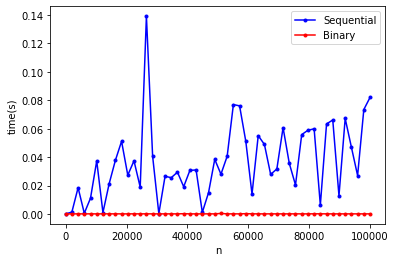

In [332]:
# 1. Set up a random experiment to test the difference between a sequential search and a binary search on a list of integers
from timeit import Timer
import matplotlib.pyplot as plt
import numpy as np 

def sequential_search(lst, item):
    for i in range(len(lst)):
        if lst[i] == item:
            return True
    return None 

def binary_search(lst, item):
    left = 0
    right = len(lst)-1
    while left <= right:
        middle = (left + right)//2 
        if lst[middle] == item:
            return True 
        elif lst[middle] < item:
            left = middle + 1
        elif lst[middle] > item:
            right = middle - 1
    return None 

X = []
Y1 = [] #sequential
Y2 = [] #binary
number = 1_0
for size in np.linspace(10, 100_000):
    size = int(size)
    x = [random.randint(0, size) for _ in range(size)]
    y = random.randint(0, size//2)
    t1 = Timer(f"sequential_search(x, y)", "from __main__ import x, y, sequential_search")
    t2 = Timer(f"binary_search(x, y)", "from __main__ import x, y, binary_search")
    X.append(size)
    Y1.append(t1.timeit(number=number))
    Y2.append(t2.timeit(number=number))


plt.plot(X, Y1, color='blue', marker='.', label='Sequential')
plt.plot(X, Y2, color='red', marker='.', label='Binary')


plt.xlabel('n')
plt.ylabel('time(s)')
plt.legend()


Generally speaking, sequential search's run time increased linearly with the increase of n, whilst binary search's search time increase is much slower (log(n) complexity worse case). The run time is not perfectly linear for sequential because there could be cases where the target element is located near the head of the list, and so the function can be terminated early once the element is found.

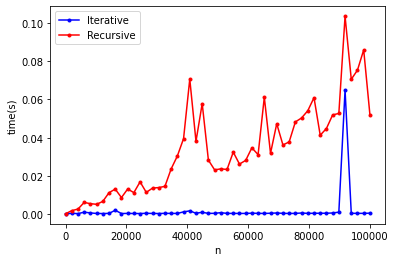

In [343]:
# 2. Use the binary search functions given in the text (recursive and iterative). Generate a random, 
# ordered list of integers and do a benchmark analysis for each one. What are your results? Can you explain them?
def recursive_slicing_main(lst, item):
    left = 0 
    right = len(lst) - 1
    if left <= right:
        middle = (left + right) // 2 
        if lst[middle] == item:
            return True 
        elif lst[middle] < item:
            return recursive_slicing_main(lst[middle+1:], item)
        elif lst[middle] > item:
            return recursive_slicing_main(lst[:middle], item)
    return None 

def binary_search_recursive_slicing(lst, item):
    return recursive_slicing_main(lst, item)

X = []
Y1 = [] #iterative
Y2 = [] #recursive
number = 1_00
for size in np.linspace(10, 100_000):
    size = int(size)
    x = [random.randint(0, size) for _ in range(size)]
    y = random.randint(0, size//2)
    t1 = Timer(f"binary_search(x, y)", "from __main__ import x, y, binary_search")
    t2 = Timer(f"binary_search_recursive_slicing(x, y)", "from __main__ import x, y, binary_search_recursive_slicing")
    X.append(size)
    Y1.append(t1.timeit(number=number))
    Y2.append(t2.timeit(number=number))


plt.plot(X, Y1, color='blue', marker='.', label='Iterative')
plt.plot(X, Y2, color='red', marker='.', label='Recursive')


plt.xlabel('n')
plt.ylabel('time(s)')
plt.legend()
    

Across the different input sizes, generally speaking iterative binary search is quicker than that of recursive binary search. This may be because calling functions within python involves creating creating new stack frames, which is likely to be more costly than simply running a while loop. Also, in the above implementation of recursive binary search slicing is involved which is an O(K) operation where K is the size of the slice. The could also add to the run time of the algorithm.

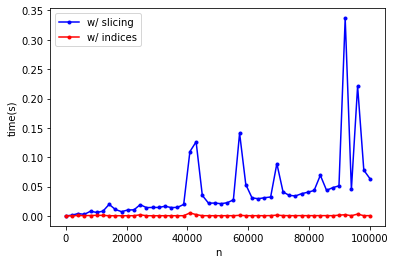

In [345]:
# 3. Implement the binary search using recursion without the slice operator. 
# Recall that you will need to pass the list along with the starting and ending index values for the sublist. 
# Generate a random, ordered list of integers and do a benchmark analysis.

def recursive_indices_main(lst, item, left, right):
    if left <= right:
        middle = (left + right) // 2 
        if lst[middle] == item:
            return middle 
        elif lst[middle] < item:
            return recursive_indices_main(lst, item, middle+1, right)
        elif lst[middle] > item:
            return recursive_indices_main(lst, item, left, middle-1)
    return None 

def binary_search_recursive_indices(lst, item):
    return recursive_indices_main(lst, item, 0, len(lst)-1)

X = []
Y1 = [] #slicing
Y2 = [] #indices
number = 1_00
for size in np.linspace(10, 100_000):
    size = int(size)
    x = [random.randint(0, size) for _ in range(size)]
    y = random.randint(0, size//2)
    t1 = Timer(f"binary_search_recursive_slicing(x, y)", "from __main__ import x, y, binary_search_recursive_slicing")
    t2 = Timer(f"binary_search_recursive_indices(x, y)", "from __main__ import x, y, binary_search_recursive_indices")
    X.append(size)
    Y1.append(t1.timeit(number=number))
    Y2.append(t2.timeit(number=number))


plt.plot(X, Y1, color='blue', marker='.', label='w/ slicing')
plt.plot(X, Y2, color='red', marker='.', label='w/ indices')


plt.xlabel('n')
plt.ylabel('time(s)')
plt.legend()


Comparing run times across different ns, binary search with slicing in general is more costly and so takes additional runtime comapred to binary search without slicing. This experiment demonstrates the additional cost involved with O(K) slicing especially as n increases, as K would also increase proportionally.

In [346]:
# 4. Implement the len method (__len__) for the hash table Map ADT implementation.
# 5. Implement the in method (__contains__) for the hash table Map ADT implementation.

from pythonds3 import HashTable

class ModHashTable(HashTable):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def __len__(self):
        return len([i for i in self._slots if type(i) == int])

    def __contain__(self, item):
        pass

